In [1]:
import pandas as pd  # requires: pip install pandas
import torch
import numpy as np
import matplotlib.pyplot as plt
from chronos import ChronosPipeline

In [2]:
pipeline = ChronosPipeline.from_pretrained(
    "amazon/chronos-t5-small",
    device_map="cpu",  # use "cpu" for CPU inference and "mps" for Apple Silicon
    torch_dtype=torch.bfloat16,
)
columns = ["File name","Source IP","Source port", "Dest IP", "Dest port","Protocol", "Epoch arival time"]

In [38]:
#df = pd.read_csv("mypcap.csv", delimiter=";") # The seperator is ;
#df = pd.read_csv("mypcap.csv", names=columns,on_bad_lines="skip") # Nicer wat to show it
#df = pd.read_csv("mypcap.csv", usecols=range(13))  # Adjust the number based on your data
df = pd.read_csv("mypcap.csv",on_bad_lines="skip") # Nicer wat to show it



In [39]:
df

,mypcap,157.240.251.61,5222,10.102.3.68,63033,TCP,1733063208.26297,2,0.0,0.066979,Unnamed: 10,104,40
0,mypcap,10.102.3.68,63033,157.240.251.61,5222,TCP,1.733063e+09,1,0.0,NaN,86.0,NaN,NaN
1,mypcap,10.102.3.68,63185,146.112.61.107,8081,TCP,1.733063e+09,1,0.0,NaN,52.0,NaN,NaN
2,mypcap,10.102.3.68,63186,146.112.61.107,8081,TCP,1.733063e+09,1,0.0,NaN,52.0,NaN,NaN
3,mypcap,10.102.3.68,63204,208.67.222.222,53,TCP,1.733063e+09,1,0.0,NaN,52.0,NaN,NaN
4,mypcap,10.102.3.68,63215,208.67.222.222,53,TCP,1.733063e+09,1,0.0,NaN,52.0,NaN,NaN
5,mypcap,10.102.3.68,63217,208.67.220.220,53,TCP,1.733063e+09,1,0.0,NaN,52.0,NaN,NaN
6,mypcap,10.102.3.68,63182,151.101.193.91,443,TCP,1.733063e+09,2,0.0,0.044201,NaN,40.0,40.0
7,mypcap,10.102.3.68,63181,151.101.65.91,443,TCP,1.733063e+09,2,0.0,0.044906,NaN,40.0,40.0
8,mypcap,10.102.3.68,63239,208.67.220.220,53,TCP,1.733063e+09,1,0.0,NaN,52.0,NaN,NaN
9,mypcap,34.120.52.64,443,10.102.3.68,61921,TCP,1.733063e+09,2,0.0,0.059744,NaN,67.0,40.0


In [40]:
df.shape

(23, 13)

In [41]:
df["TCP"]
print(df["TCP"].head())

0    TCP
1    TCP
2    TCP
3    TCP
4    TCP
Name: TCP, dtype: object


In [43]:
print(df["TCP"].head(20))
print(df["TCP"].dtypes)
print(df["TCP"].unique())  # Shows all unique values in the column

0     TCP
1     TCP
2     TCP
3     TCP
4     TCP
5     TCP
6     TCP
7     TCP
8     TCP
9     TCP
10    TCP
11    TCP
12    TCP
13    TCP
14    TCP
15    TCP
16    TCP
17    UDP
18    UDP
19    TCP
Name: TCP, dtype: object
object
['TCP' 'UDP']


In [45]:
df["TCP"] = df["TCP"].str.strip()
df["TCP"]

0     TCP
1     TCP
2     TCP
3     TCP
4     TCP
5     TCP
6     TCP
7     TCP
8     TCP
9     TCP
10    TCP
11    TCP
12    TCP
13    TCP
14    TCP
15    TCP
16    TCP
17    UDP
18    UDP
19    TCP
20    TCP
21    TCP
22    TCP
Name: TCP, dtype: object

In [46]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["TCP"] = le.fit_transform(df["TCP"].astype(str))
print(le.classes_)  # Optional: Shows the mapping of labels to numbers

['TCP' 'UDP']


In [48]:
print(df["TCP"].isna().sum())

0


In [49]:
forecast = pipeline.predict(
    context=torch.tensor(df["TCP"].dropna().values, dtype=torch.float32),
    prediction_length=12
)

# Data exploration

In [50]:
df['TCP'].mean()

0.08695652173913043

<Axes: xlabel='TCP', ylabel='Count'>

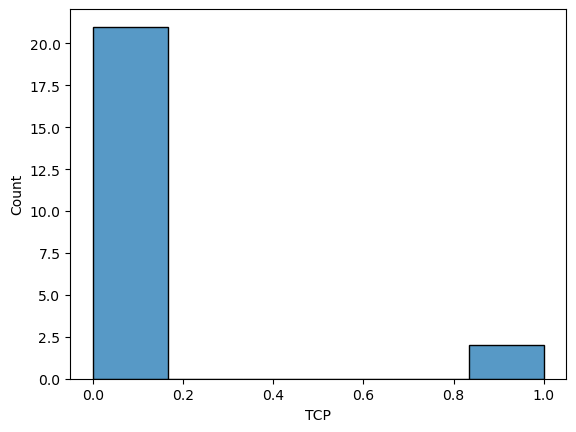

In [51]:
import seaborn as sns
sns.histplot(df['TCP'])#,kde = True, bins=50)

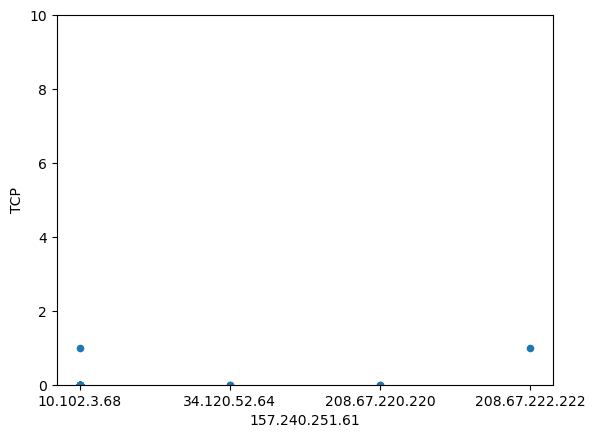

In [54]:
var = '157.240.251.61'
data = pd.concat([df['TCP'], df[var]], axis=1)
data.plot.scatter(x=var, y='TCP', ylim=(0,10)); # do not `assume here any thing this is just examples
plt.show() # Display

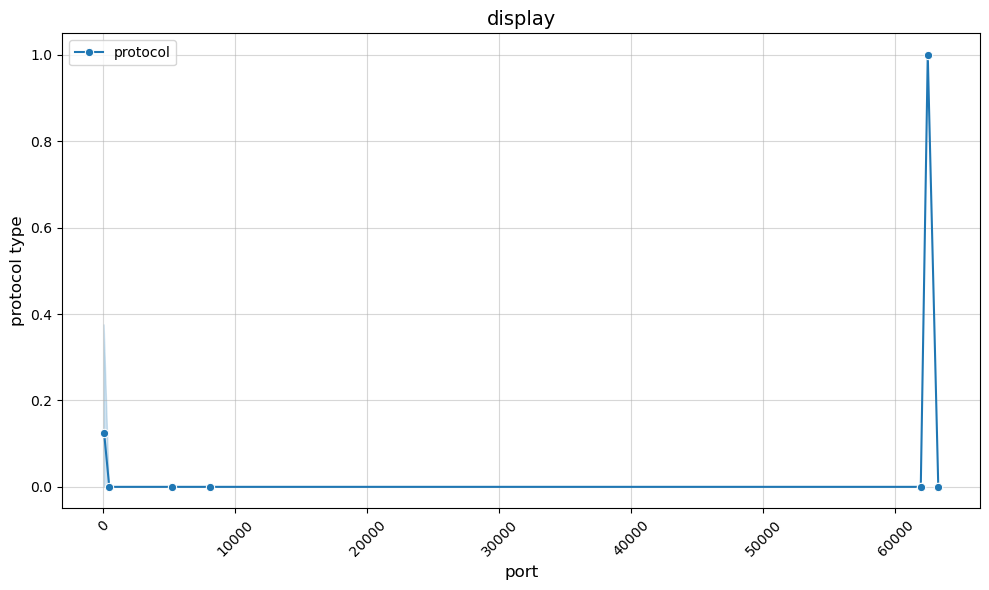

In [57]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='63033', y='TCP', marker='o', label='protocol')

# Add labels, title, and legend
plt.xlabel('port', fontsize=12)
plt.ylabel('protocol type', fontsize=12)
plt.title('display', fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels
plt.legend()
plt.grid(alpha=0.5)  # Add a light grid
plt.tight_layout()
plt.show()

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mypcap            23 non-null     object 
 1   157.240.251.61    23 non-null     object 
 2   5222              23 non-null     int64  
 3   10.102.3.68       23 non-null     object 
 4   63033             23 non-null     int64  
 5   TCP               23 non-null     int32  
 6   1733063208.26297  23 non-null     float64
 7   2                 23 non-null     int64  
 8   0.0               23 non-null     float64
 9   0.066979          9 non-null      float64
 10  Unnamed: 10       14 non-null     float64
 11  104               9 non-null      float64
 12  40                9 non-null      float64
dtypes: float64(6), int32(1), int64(3), object(3)
memory usage: 2.4+ KB


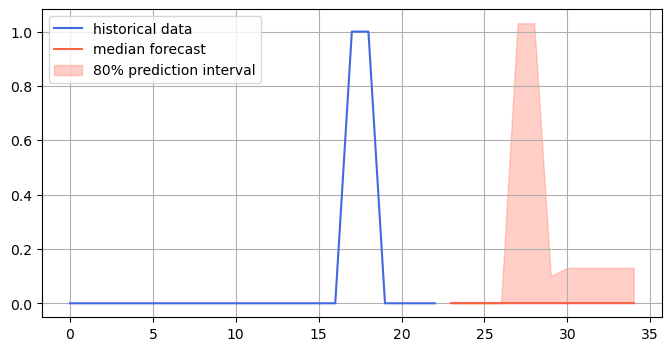

In [70]:
# X-axis for historical and forecast data
historical_index = range(len(df))  # x-axis for historical data
forecast_index = range(len(df), len(df) + 12)  # x-axis for forecast

# Compute forecast quantiles
low, median, high = np.quantile(forecast[0].numpy(), [0.1, 0.5, 0.9], axis=0)

# Plotting
plt.figure(figsize=(8, 4))

# Historical data
plt.plot(historical_index, df["TCP"], color="royalblue", label="historical data")

# Forecast data
plt.plot(forecast_index, median, color="tomato", label="median forecast")
plt.fill_between(forecast_index, low, high, color="tomato", alpha=0.3, label="80% prediction interval")

# Add legend and grid
plt.legend()
plt.grid()
plt.show()


# Using feature selection for the csv

## Using select K-best